Dataset shape: (284807, 31)

Sample data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.2

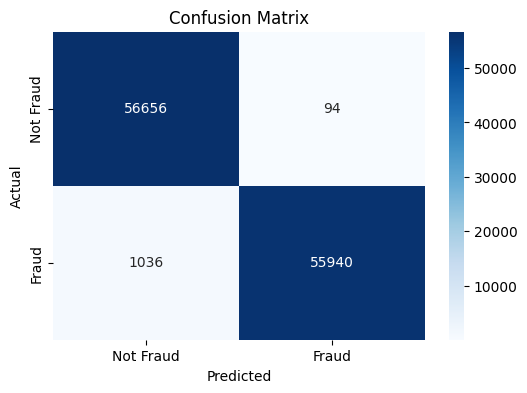

In [10]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# 2. Load the dataset
df = pd.read_csv('/content/7. Predict Credit Card Fraud.csv')

# 3. Display basic dataset info
print(f"Dataset shape: {df.shape}\n")
print("Sample data:")
print(df.head())

# 4. Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# 5. Check class imbalance
print("\nClass distribution before balancing:")
print(df['Class'].value_counts())

# 6. Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# 7. Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# 8. Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 9. Train a simplified Random Forest model for faster execution
model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 10. Make predictions
y_pred = model.predict(X_test)

# 11. Evaluate model performance
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 12. Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
